<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a contingency table of workclass and sex, and plot it.

In [ ]:
# https://colab.research.google.com/github/bforoura/IDS/blob/main/contingency_tables.ipynb
# https://github.com/kgazaleh/thwnd_2000-IDS/tree/main/HW4

# import data from github

import numpy as np
import pandas as pd
import matplotlib as pl

adult_trainingDF  = pd.read_csv("https://raw.githubusercontent.com/kgazaleh/thwnd_2000-IDS/main/HW4/adult_training.csv");

adult_trainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [ ]:
# Cross tabulation of workclass and sex

p_crosstab = pd.crosstab(adult_trainingDF.workclass, adult_trainingDF.sex)

print(p_crosstab)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


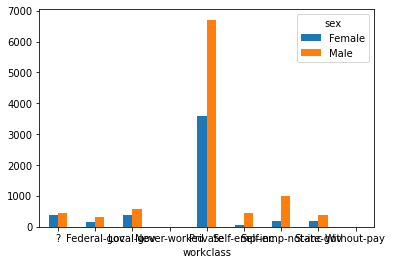

In [ ]:
# Creating barplot

p_crosstab = pd.crosstab(adult_trainingDF.workclass, adult_trainingDF.sex)

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)

Create a contingency table of sex and marital status, and plot it.

In [ ]:
# Cross tabulation of sex and marital status

# change name of marital column
adult_trainingDF.rename(columns = {'marital-status' : 'marital'}, inplace = True)

p_crosstab = pd.crosstab(adult_trainingDF.sex, adult_trainingDF.marital)

print(p_crosstab)

marital  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                        
Female       1219                  7                 761   
Male          795                  4                6010   

marital  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                
Female                      95           2160        290      380  
Male                       104           2717        182       73  


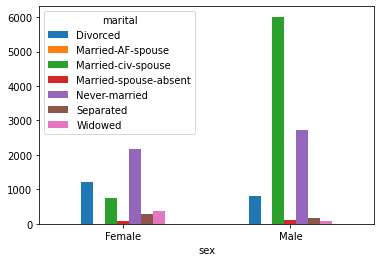

In [ ]:
# plot sex and marital status

barplot = p_crosstab.plot.bar(rot=0)

Create a new data frame, adultOver40, for those whose age > 40.

In [ ]:
# bin the ages - create new df
adultover40 = adult_trainingDF.loc[(adult_trainingDF['age']>40)]
adultover40

,age,workclass,education,marital,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


Recreate the contingency table of sex and marital status for adultOver40.

In [ ]:
crosstab3=pd.crosstab(adultover40.sex, adultover40.marital)
crosstab3

marital,Divorced,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,
Female,720,305,38,256,133,354
Male,448,3383,47,315,74,71


Determine whether any outliers exist for the education field.

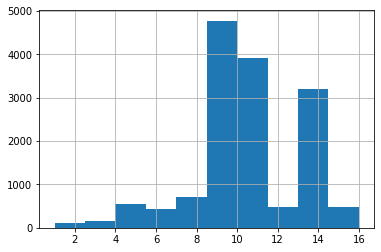

In [ ]:
# create histogram
adult_trainingDF.education.hist()


In [ ]:
# Compute the basis stats for adult_trainingDF.education

adult_trainingDF['education'].describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

In [ ]:
# Standard-scale education column
from scipy import stats
import matplotlib.pyplot as plt

adult_trainingDF['scaled_education'] = stats.zscore(adult_trainingDF.education, nan_policy='omit')

adult_trainingDF['scaled_education'].describe()

count    1.479700e+04
mean    -5.895954e-16
std      1.000034e+00
min     -3.490403e+00
25%     -4.113594e-01
50%     -2.647890e-02
75%      7.432821e-01
max      2.282804e+00
Name: scaled_education, dtype: float64

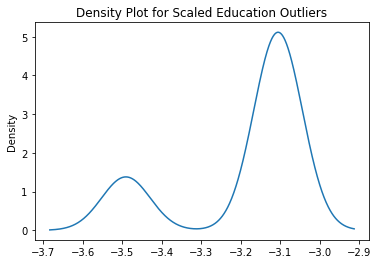

In [ ]:
# Determine the outliers using the three sigma rule

adult_trainingDF_outliers = adult_trainingDF.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']

adult_trainingDF_outliers.plot.density()
plt.title('Density Plot for Scaled Education Outliers')
plt.show()

 Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

In [ ]:
# Standard-scale age column
from scipy import stats
import matplotlib.pyplot as plt

adult_trainingDF['scaled_age'] = stats.zscore(adult_trainingDF.age, nan_policy='omit')

adult_trainingDF['scaled_age'].describe()

count    1.479700e+04
mean     5.678291e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: scaled_age, dtype: float64

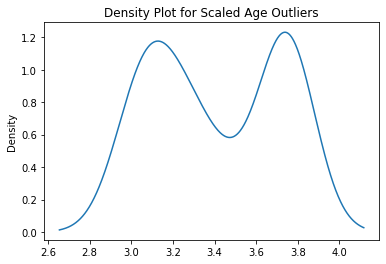

In [ ]:
# Determine the outliers using the three sigma rule

adult_trainingDF_outliers = adult_trainingDF.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

adult_trainingDF_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.

In [ ]:
adult_trainingDF['age'].describe()

count    14797.000000
mean        38.687437
std         13.678875
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
#Convert age column from str to int
adult_trainingDF['age'] = adult_trainingDF['age'].astype(int)

In [ ]:
# Select all individuals at least 80 years old
adultOver80=adult_trainingDF.loc[adult_trainingDF["age"] >= 80]

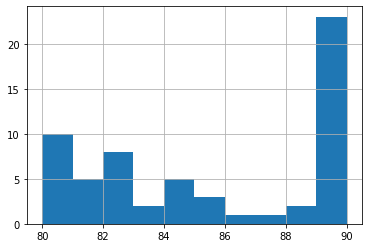

In [ ]:
#Construct histogram of age
adultOver80.age.hist()

For adults of age 80 or greater, the most often occurring ages are closer to 90 than 80.

In terms of workclass, it is most common for both males and females to fall into the private category. The marital status category with the most amount of females is never married, which is the second most common category for males. The number of males who are married with a civil spouse is close to 6000, higher than any other category for males or females.